In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

Link to the original image \\
https://static.wikia.nocookie.net/thebate/images/b/b2/Silvie%27s_white_form_.jpg/revision/latest?cb=20210411135220

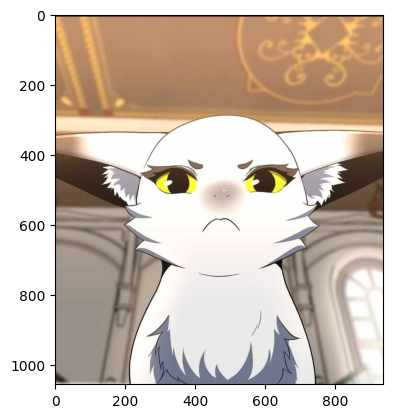

In [ ]:
img = cv.imread("/content/sylv2.webp")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

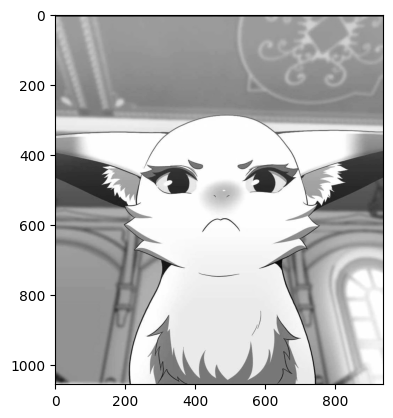

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
plt.imshow(img, cmap='gray')

In [ ]:
img.shape

(1056, 939)

# TP 2

## Inverse

In [ ]:
def inverse(image):
  return 255-image.copy()

Text(0.5, 1.0, 'Implementation')

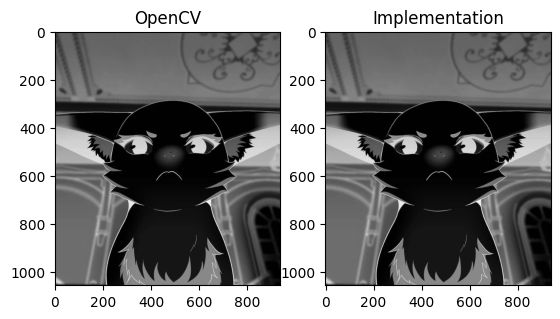

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
cvinv = cv.bitwise_not(img)
invrt = inverse(img)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(cvinv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(invrt, cmap="gray")
axes[1].set_title('Implementation')

## Seuillage

In [ ]:
def threshold(image, low, high):
  rez = image.copy()
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] <= low:
        rez[i][j] = 0
      if image[i][j] >= low:
        rez[i][j] = 255
  return rez

Text(0.5, 1.0, 'Implementation')

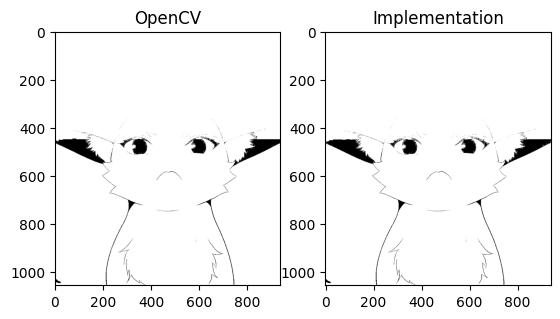

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
ret, thresholded_image = cv.threshold(img, 50, 100, cv.THRESH_BINARY)
thrs = threshold(img, 50, 100)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(thresholded_image, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(thrs, cmap="gray")
axes[1].set_title('Implementation')

## Normalisation d’histogramme

In [ ]:
def normalize(image, minValue, maxValue):
  rez = image.copy()/255
  assert(minValue <= maxValue)
  fmin = np.min(image)
  fmax = np.max(image)
  rez = (rez - minValue) * (maxValue - minValue) / (fmax - fmin) + fmin
  return rez*255

Text(0.5, 1.0, 'Implementation')

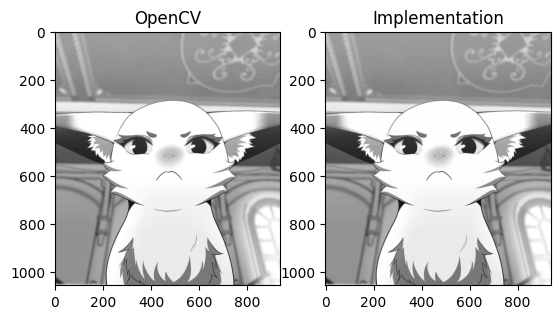

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
normalized_image = cv.normalize(img, None, alpha=0, beta=100, norm_type=cv.NORM_MINMAX)
hist1 = cv.calcHist([normalized_image], [0], None, [256], [0, 256])
thrs = normalize(img, 0, 100)
hist2 = cv.calcHist([thrs.astype('uint8')], [0], None, [256], [0, 256])

fig, axes = plt.subplots(1, 2)

axes[0].imshow(normalized_image, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(thrs, cmap="gray")
axes[1].set_title('Implementation')

Text(0.5, 1.0, 'Original Histogram')

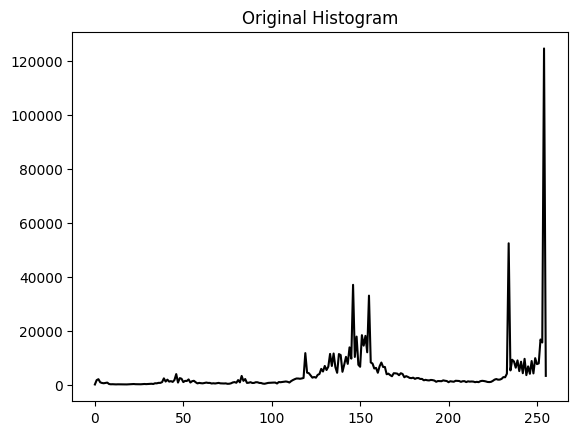

In [ ]:
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color="black")
plt.title('Original Histogram')

Text(0.5, 1.0, 'Implementation')

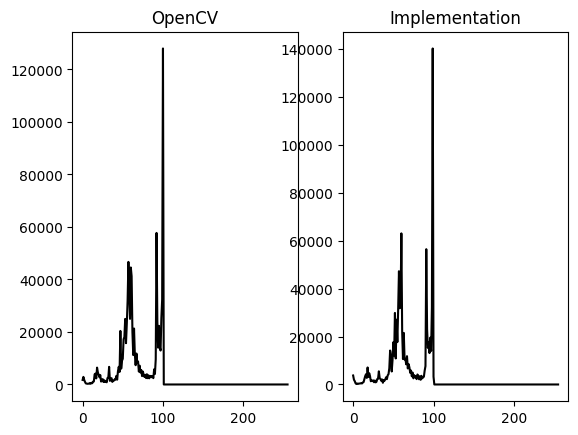

In [ ]:
fig, axes = plt.subplots(1, 2)

axes[0].plot(hist1, color="black")
axes[0].set_title('OpenCV')

axes[1].plot(hist2, color="black")
axes[1].set_title('Implementation')

# TP 3

## Mean Filter

In [ ]:
def meanFilter(image, k):
  # check that k is odd
  assert(k%2 != 0)
  # resulting image
  result = np.zeros((image.shape[0], image.shape[1]))
  # pad the image to apply the filter on it
  padding = k // 2
  padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  for i in tqdm(range(image.shape[0])):
    for j in range(image.shape[1]):
      # Extract the neighborhood
      neighborhood = padded[i:i + k, j:j + k]
      # Compute the mean and assign it to the corresponding pixel in the output image
      result[i, j] = np.mean(neighborhood)
  return result

100%|██████████| 1056/1056 [00:12<00:00, 84.87it/s]


Text(0.5, 1.0, 'Implementation')

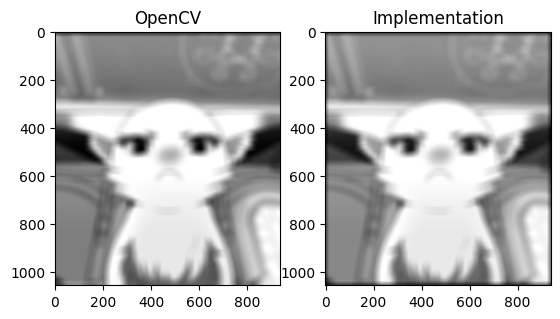

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
meanerso = meanFilter(img, 35)
meanCV = cv.blur(img, (35, 35))

fig, axes = plt.subplots(1, 2)

axes[0].imshow(meanCV, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(meanerso, cmap="gray")
axes[1].set_title('Implementation')

## Convolution

In [ ]:
def convolution(image, kernel):
  # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Compute the padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Initialize an empty array for the output image
    convolved_image = np.zeros_like(image)

    # Perform 2D convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest (ROI) from the padded image
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Apply convolution by element-wise multiplication and summation
            value = np.sum(roi * kernel)
            if value > 255:
              convolved_image[i, j] = 255
            if value < 0:
              convolved_image[i, j] = 0
            else:
              convolved_image[i, j] = value
    return convolved_image

Text(0.5, 1.0, 'Implementation')

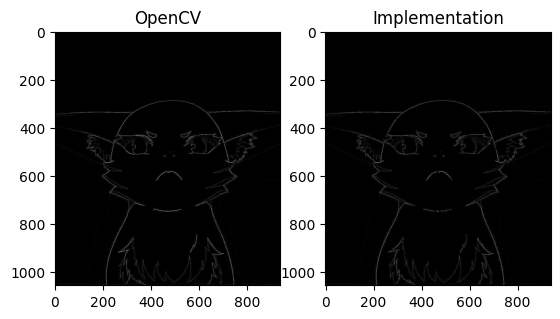

In [ ]:
laplace = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])
img = cv.imread("/content/sylv2.webp", 0)
implementation = convolution(img, laplace)
opencv = cv.filter2D(img, -1, laplace)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')

## Sobel Filter


In [ ]:
def edgeSobel(image):
  # Define Sobel kernels
  sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

  sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

  gradient_x = convolution(image, sobel_x)
  gradient_y = convolution(image, sobel_y)

  edges = np.abs(gradient_x) + np.abs(gradient_y)


  edges = np.clip(edges, 0, 255)  # Clamp values to 0-255

  return edges

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in y direction
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of gradients
opencv = np.abs(sobel_x) + np.abs(sobel_y)
opencv = opencv * np.max(opencv) * 255

Text(0.5, 1.0, 'Implementation')

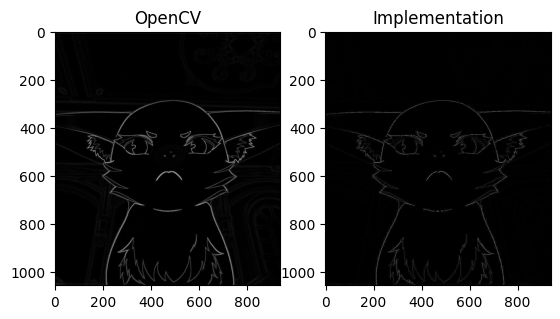

In [ ]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')

# TP 4


## Transpose

In [ ]:
def transpose(image):
  result = image.T
  return result

Text(0.5, 1.0, 'Implementation')

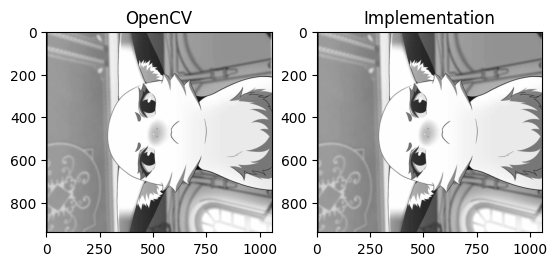

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
implementation = transpose(img)
opencv = cv.transpose(img)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')

## Interpolation

In [ ]:
def expand(image, factor, interpolation_function):

  assert factor > 0, "Factor must be positive"

  # Calculate output image dimensions
  new_rows = (image.shape[0] - 1) * factor
  new_cols = (image.shape[1] - 1) * factor

  res = np.zeros((new_rows, new_cols), dtype=image.dtype)

  # Iterate through each pixel
  for y in range(new_rows):
    for x in range(new_cols):
      # Calculate normalized coordinates within the original image
      y_norm = y / factor
      x_norm = x / factor

      # Apply the interpolation function to get the interpolated value
      interpolated_value = interpolation_function(image, y_norm, x_norm)

      # Set the value in the output image
      res[y, x] = interpolated_value

  return res

### Interpolation plus proche voisin

In [ ]:
def interpolate_nearest(image, y, x):

  # Handle edge cases (coordinates outside image bounds)
  if y < 0 or y >= image.shape[0] or x < 0 or x >= image.shape[1]:
    return 0  # Return black for out-of-bounds pixels

  # Round coordinates to nearest integer indices
  y_int = int(round(y))
  x_int = int(round(x))

  # Extract the nearest neighbor pixel value
  return image[y_int, x_int]

Text(0.5, 1.0, 'Implementation')

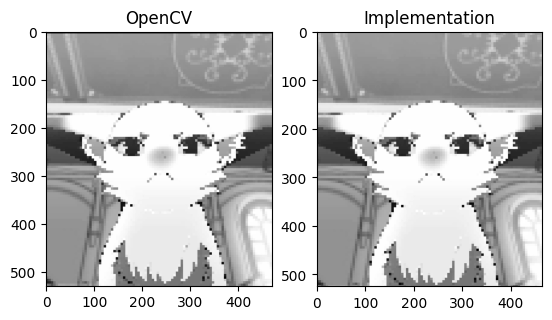

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
factor = 0.1
img = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_NEAREST)
factor = 5
implementation = expand(img, factor, interpolate_nearest)
opencv = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_NEAREST)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')

### Interpolation bilinear

In [ ]:
def interpolate_bilinear(image, y, x):

  # Handle edge cases
  if y < 0 or y >= image.shape[0] or x < 0 or x >= image.shape[1]:
    return 0

  # Get integer coordinates of the surrounding pixels
  y0 = int(np.floor(y))
  x0 = int(np.floor(x))
  y1 = y0 + 1
  x1 = x0 + 1

  # Check for edge cases
  if y1 >= image.shape[0]:
    y1 = image.shape[0] - 1
  if x1 >= image.shape[1]:
    x1 = image.shape[1] - 1

  # Calculate weights for interpolation
  t = y - y0
  u = x - x0

  value = (1 - t) * (1 - u) * image[y0, x0] + \
          (1 - t) * u * image[y0, x1] + \
          t * (1 - u) * image[y1, x0] + \
          t * u * image[y1, x1]

  return value

Text(0.5, 1.0, 'Implementation')

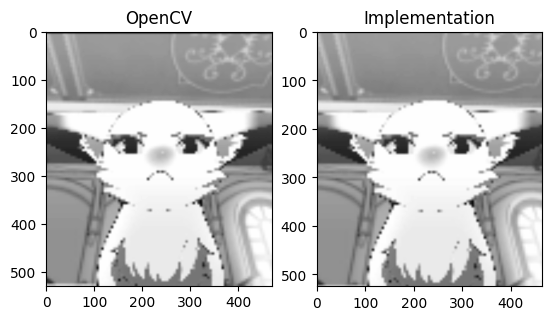

In [ ]:
img = cv.imread("/content/sylv2.webp", 0)
factor = 0.1
img = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_LINEAR)
factor = 5
implementation = expand(img, factor, interpolate_bilinear)
opencv = cv.resize(img, None, fx=factor, fy=factor, interpolation=cv.INTER_LINEAR)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(opencv, cmap="gray")
axes[0].set_title('OpenCV')

axes[1].imshow(implementation, cmap="gray")
axes[1].set_title('Implementation')